# **Knowledge Discovery in Databases (KDD) Process 💡**

The KDD process is a structured methodology used to extract useful knowledge from large volumes of data. It encompasses several key steps to ensure that the derived knowledge is valid, novel, and actionable.

In [1]:
pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 40.6 MB/s eta 


# **Data Selection - Business Understanding:**
Objective: Choose the data relevant to the analysis task from the database.

In this step, we decide on the dataset we wish to analyze. This might involve selecting specific tables, attributes, or even particular records from a large database. The aim is to narrow down our data pool to a manageable size that's relevant for our analytical goal.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *

# **Upload the dataset - adult.data**

1. Set up the environment 🌐

In this section, we import necessary libraries for data handling and visualization. We also leverage Google Colab's built-in files.upload() function to facilitate the seamless upload of our dataset.

In [2]:
from google.colab import files

In [73]:
uploaded = files.upload()

Saving adult.data to adult.data


In [74]:
#The uploaded file's name is 'adult.data'
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data = pd.read_csv('adult.data', names=column_names, sep='\s*,\s*', engine='python')

# **Data Preprocessing:**

### Objective: Clean and preprocess the data to make it suitable for analysis.
Data in the real world is messy. In the preprocessing step, we handle missing values, outliers, and possibly noisy data. This might involve imputing missing data, filtering out outliers, or smoothing noisy data. Preprocessing ensures that our data is of high quality and ready for the next steps.

In [75]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [76]:
data.replace('?', np.NaN, inplace=True)

In [77]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

# **Data Transformation:**
## Objective: Convert data into a suitable format or structure for analysis.

In the transformation phase, we might need to normalize or scale our data, especially if we're dealing with features that have different units or scales. We might also generate new features, aggregate data, or even decompose existing features. The goal is to structure our data in a way that enhances the capability of our analytical tools.



In [78]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [79]:
clf1 = setup(data, target = 'income', session_id=123)

,Description,Value
0,Session id,123
1,Target,income
2,Target type,Binary
3,Target mapping,"<=50K: 0, >50K: 1"
4,Original data shape,"(32561, 15)"
5,Transformed data shape,"(32561, 65)"
6,Transformed train set shape,"(22792, 65)"
7,Transformed test set shape,"(9769, 65)"
8,Ordinal features,1
9,Numeric features,6


# **Data Mining:**
## Objective: Apply data mining techniques to extract patterns.
This is the core step of the KDD process. Here, we use various data mining algorithms to find patterns, associations, anomalies, or structures in our data. Depending on our goal, this might involve clustering, classification, regression, or even association rule mining.

In [80]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8718,0.9270,0.6635,0.7726,0.7135,0.6316,0.6349,1.7030
catboost,CatBoost Classifier,0.8706,0.9281,0.6582,0.7714,0.7100,0.6274,0.6309,13.8250
xgboost,Extreme Gradient Boosting,0.8671,0.9242,0.6551,0.7602,0.7036,0.6186,0.6215,7.9100
gbc,Gradient Boosting Classifier,0.8652,0.9213,0.6079,0.7845,0.6847,0.6008,0.6089,5.5790
ada,Ada Boost Classifier,0.8598,0.9170,0.6127,0.7592,0.6779,0.5896,0.5953,1.7880
rf,Random Forest Classifier,0.8525,0.9035,0.6263,0.7249,0.6715,0.5772,0.5801,4.0330
lda,Linear Discriminant Analysis,0.8396,0.8933,0.5602,0.7127,0.6272,0.5269,0.5332,0.8600
ridge,Ridge Classifier,0.8389,0.0000,0.5014,0.7468,0.5997,0.5038,0.5196,0.5940
et,Extra Trees Classifier,0.8315,0.8794,0.6048,0.6658,0.6335,0.5245,0.5257,4.6480
dt,Decision Tree Classifier,0.8142,0.7509,0.6287,0.6115,0.6197,0.4969,0.4972,0.6860


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

# **Visualization:**

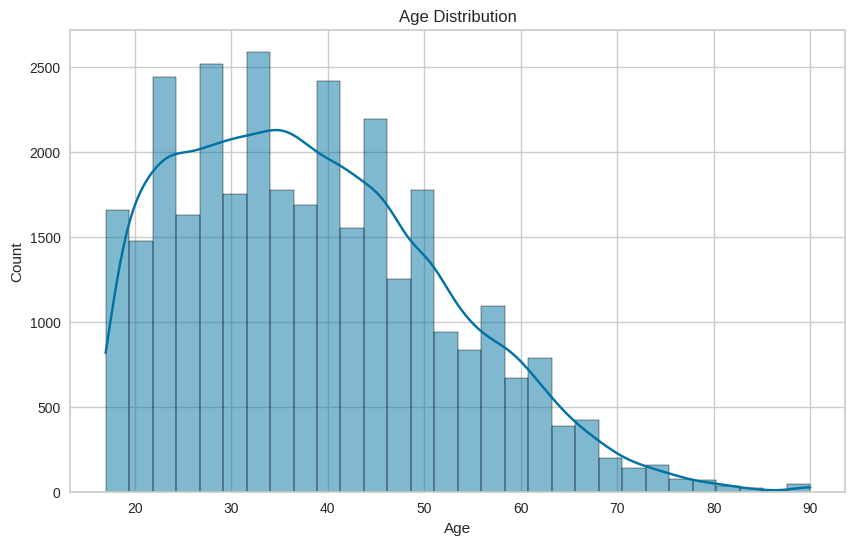

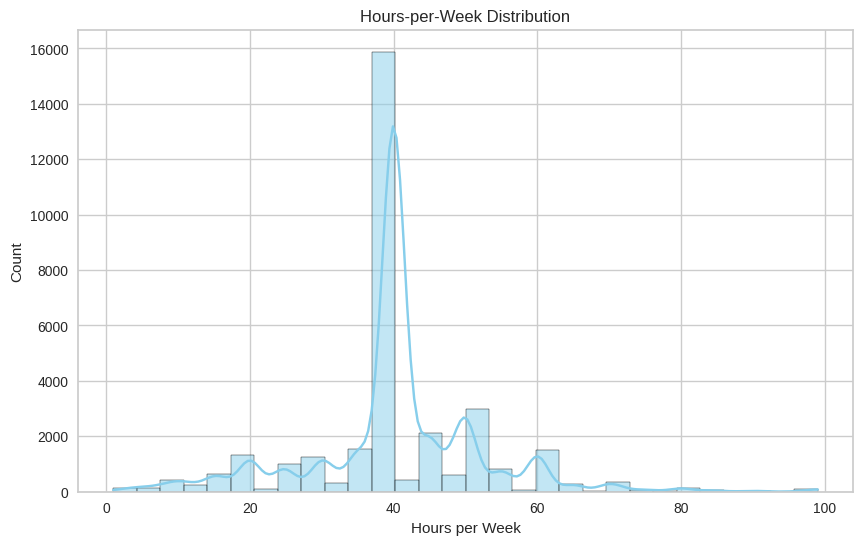

In [81]:
# Histogram for age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Histogram for hours-per-week distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['hours-per-week'], bins=30, kde=True, color='skyblue')
plt.title('Hours-per-Week Distribution')
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.show()

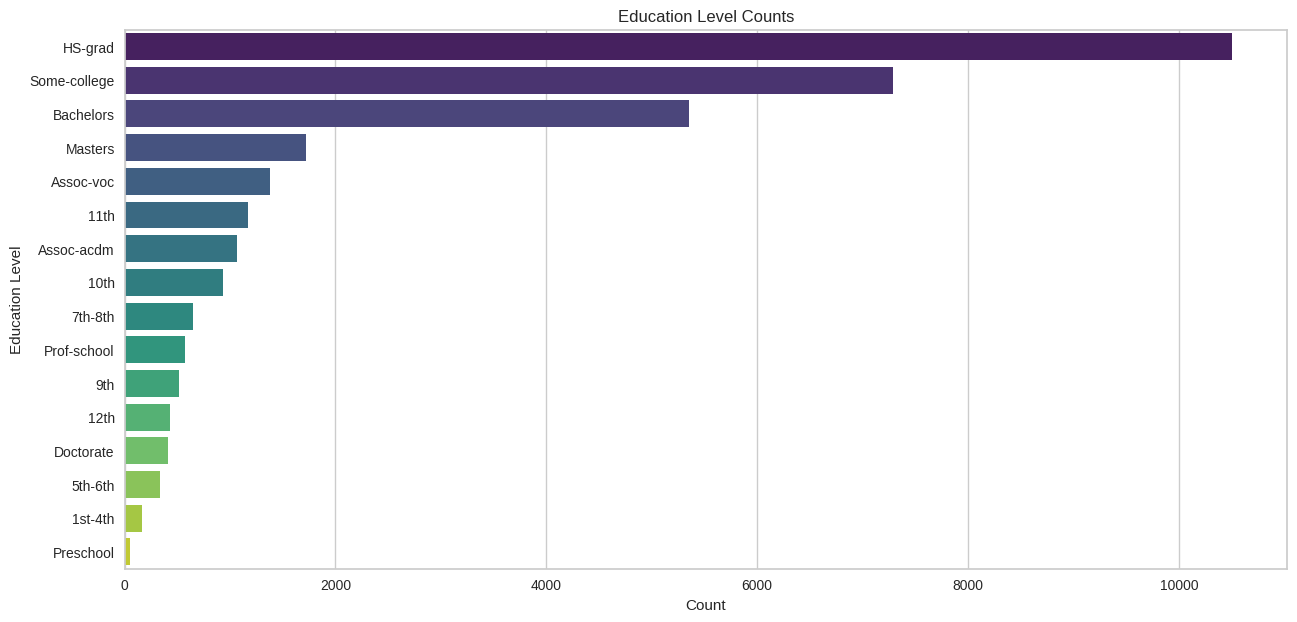

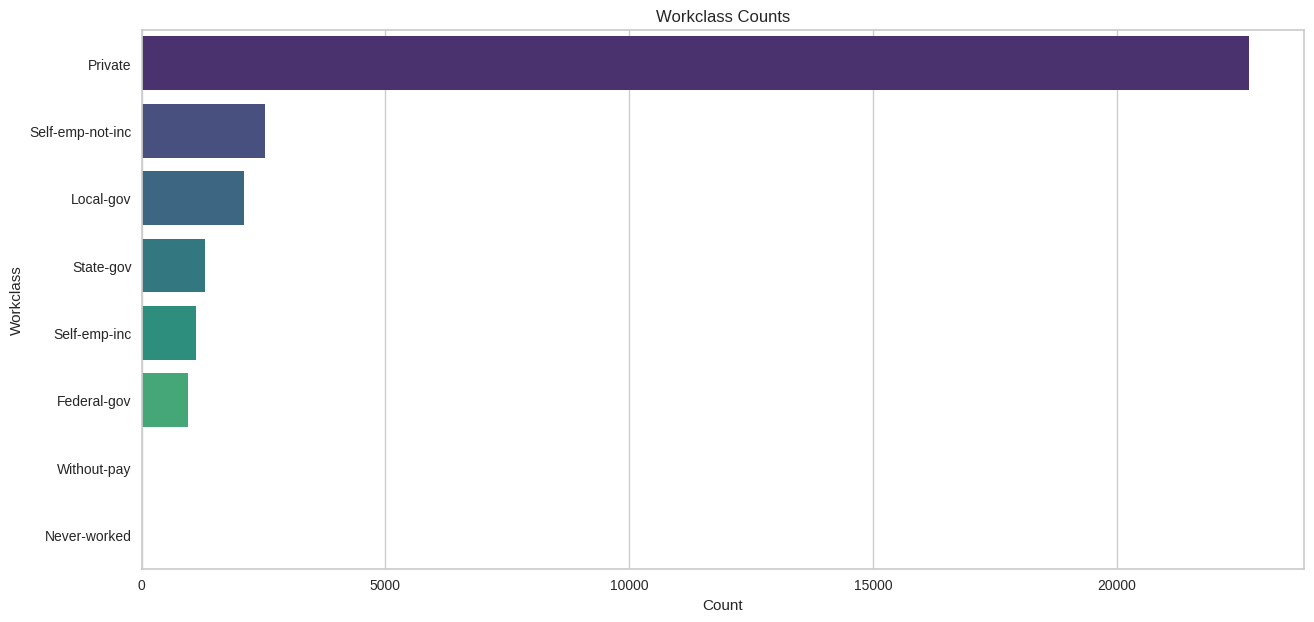

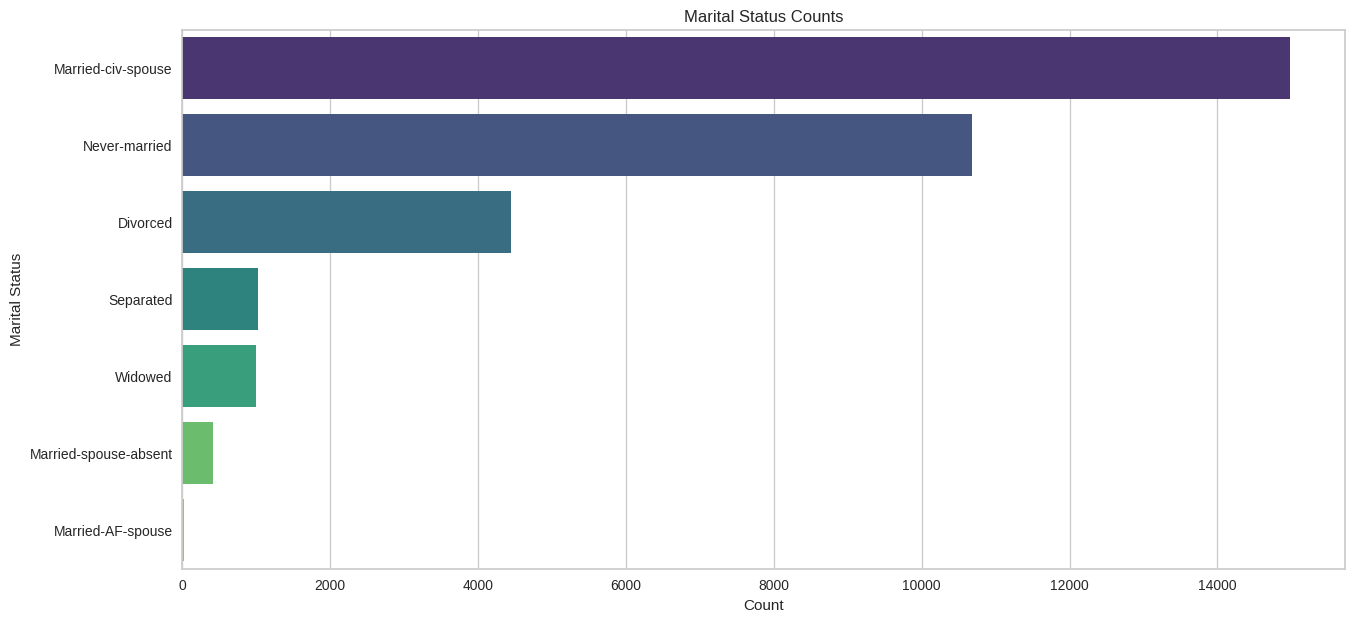

In [82]:
# Countplot for education levels
plt.figure(figsize=(15, 7))
sns.countplot(y=data['education'], order=data['education'].value_counts().index, palette='viridis')
plt.title('Education Level Counts')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()

# Countplot for workclass
plt.figure(figsize=(15, 7))
sns.countplot(y=data['workclass'], order=data['workclass'].value_counts().index, palette='viridis')
plt.title('Workclass Counts')
plt.xlabel('Count')
plt.ylabel('Workclass')
plt.show()

# Countplot for marital-status
plt.figure(figsize=(15, 7))
sns.countplot(y=data['marital-status'], order=data['marital-status'].value_counts().index, palette='viridis')
plt.title('Marital Status Counts')
plt.xlabel('Count')
plt.ylabel('Marital Status')
plt.show()

# **Interpretation/Evaluation:**
## Objective: Interpret and evaluate the mined patterns.
Once we've mined some patterns or models, it's crucial to interpret them in the context of our domain or problem. This might involve visualizations, statistical tests, or even domain-specific knowledge. We also need to evaluate our findings: Are the patterns valid? Are they novel? Are they actionable? If a pattern doesn't meet these criteria, it might not be useful, regardless of how statistically significant it is.

In [83]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [84]:
final_model = finalize_model(best_model)
save_model(final_model, 'final_model_adult_income')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'fnlwgt', 'education-num',
                                              'capital-gain', 'capital-loss',
                                              'hours-per-week'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
       